In [103]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


# Lendo os dados

In [104]:
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [106]:
df.species = df.species.map({'setosa':0, 'virginica':1, 'versicolor':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Analisando os dados do DataSet Iris

In [107]:
df['species'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='species'>

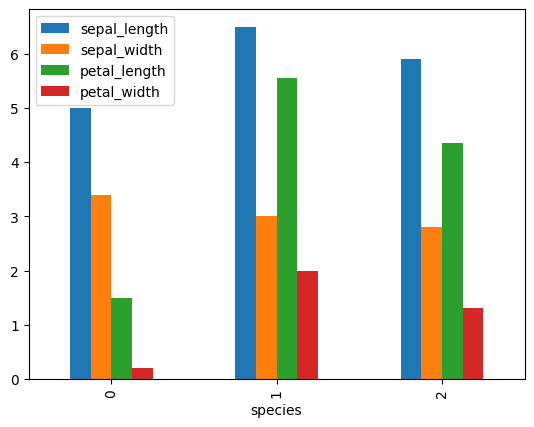

In [108]:
df.groupby('species').median().plot(kind='bar')

In [109]:
headers_list = df.columns.values.tolist()

In [110]:
cm = np.corrcoef(df[headers_list].values.T)

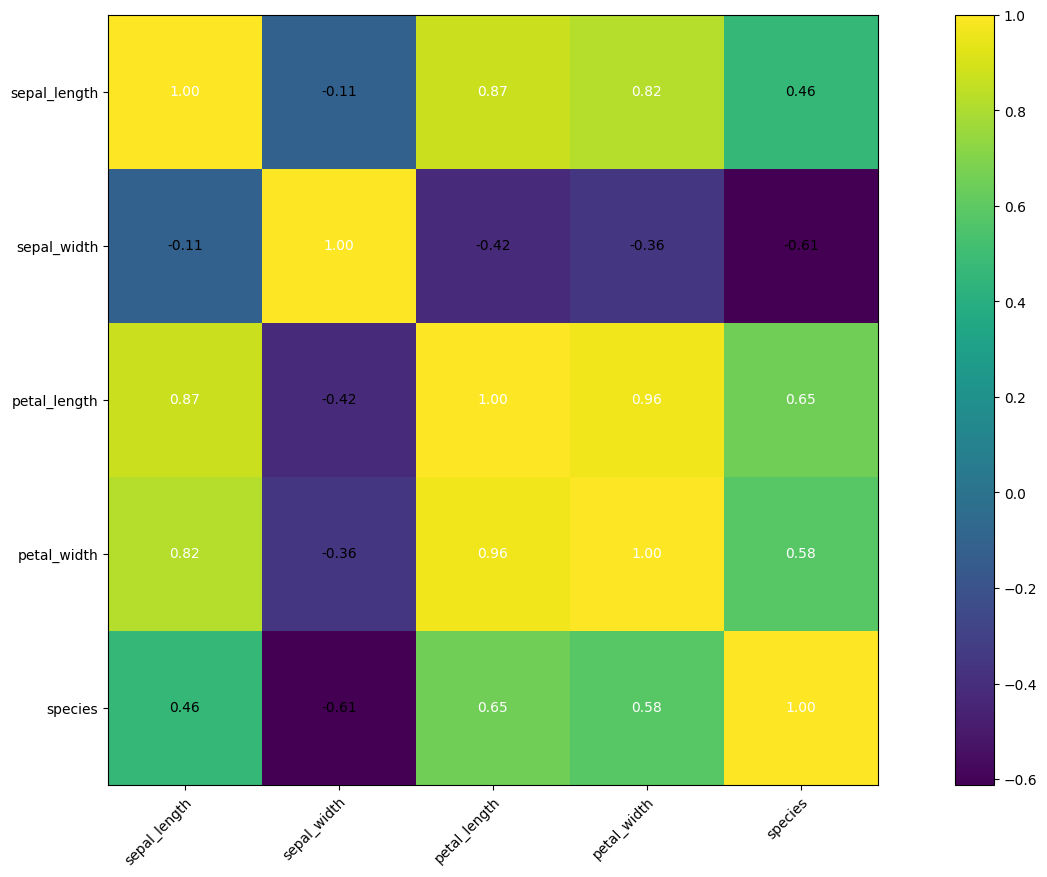

In [111]:
# Checando a coorelação entre as variáveis

hm = heatmap(cm, row_names= headers_list,column_names= headers_list, figsize=[20,10])
plt.show()


### Conclusão
O DataSet oferece uma distribução de flores, suas caracteristicas físicas e sua respectiva especies. Com isso irei utilizar as caracteristicas mais relevantes de cada flor para determinar qual especie ela é. Todas a caracteristas são úteis para poder fazer o modelo, exceto a 'Sepal Width', essa é a única caracteristica que não será relevante para a criação do modelo

## Separando X e y

In [112]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [113]:
data = df.to_numpy()
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [114]:
data.shape

(150, 5)

In [115]:
X = data[:,:-1]

y = data[:, -1]


In [116]:
print(X)
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

In [117]:
print(y)
y.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


(150,)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [119]:
X_train.shape

(112, 4)

In [120]:
X_test.shape

(38, 4)

# Tratamento de Dados

#### Converter cada array de Numpy em Tensores

In [121]:
X_test_T = torch.tensor(X_test)
X_train_T = torch.tensor(X_train)
y_test_T = torch.tensor(y_test)
y_train_T = torch.tensor(y_train)



In [122]:

class Iris_Dataset(Dataset):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
    
    
# 

## Data Loader

In [123]:
train_dl = DataLoader(Iris_Dataset(X_train_T, y_train_T),  batch_size = len(X_train_T) )
test_dl  = DataLoader(Iris_Dataset(X_test_T, y_test_T),  batch_size = len(X_test_T) )
                             
   

# Criando o Modelo MLP

In [124]:
# Criar uma classe que herda o modulo nn.Module
class MLP_Model(nn.Module):
    
    def __init__(self):
        super(MLP_Model,self).__init__()
        
        # nn.Linear(a,b) --> a entrada, b mapeia ?
        # O primeiro neurônio tem 4 no parênteses pois o data set tem 4 caracteristicas no X,  
        
        self.L1 =  nn.Linear(4,32)
        
        
        
        self.A1 =  nn.Sigmoid()
        
        # No segundo, receberá o tanto que saiu na layer passada, logo:
        # nn.Linear(c,d) --> c == a, d == quantidasde que sera y previsto, ex: probabilidade de ser cada uma das flores
        
        self.L2 =  nn.Linear(32,16)
        
        self.L3 =  nn.Linear(16,8)
        
        self.L4 =  nn.Linear(8,3) 
        
        # SoftMax é uma função para classificação, ela é similar à função sigmoid
        
        self.A2 = nn.Softmax()
        
    def forward(self, x):
        
        
        
        x = self.L1(x)
        
        
        # Aqui estou transformando o vetor inicial de 4 em um vetor de 5
        
        x = self.A1(x)
       
        
        # Escalando o vetor via função sigmoid, outra possivel é a função reLU --> ler mais sobre
        
        x = self.L2(x)
        
        
        x = self.A1(x)
        
        x = self.L3(x)
        
        x = self.A1(x)
        
        x = self.L4(x)
        
        # Aqui estou transformando o vetor modificado de tamanho 5 em um vetor de 3
        
        x = self.A2(x)
        
        
        
        return x       

In [125]:
value_before_train = torch.histogram(MLP_Model().L1.weight.detach())

X_before = value_before_train[1][0:100]
y_before = value_before_train[0]




# Treino


--> Rascunho


In [126]:

def training( N_Epochs, model, loss_fn, opt  ):
    
    loss_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            print(model.L1)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            loss_list.append(loss.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            




Linear(in_features=4, out_features=32, bias=True)
0 loss= 1.098531723022461
Linear(in_features=4, out_features=32, bias=True)
1 loss= 1.0980478525161743
Linear(in_features=4, out_features=32, bias=True)
2 loss= 1.0975914001464844
Linear(in_features=4, out_features=32, bias=True)
3 loss= 1.0971628427505493
Linear(in_features=4, out_features=32, bias=True)
4 loss= 1.0967624187469482
Linear(in_features=4, out_features=32, bias=True)
5 loss= 1.0963904857635498
Linear(in_features=4, out_features=32, bias=True)
6 loss= 1.0960466861724854
Linear(in_features=4, out_features=32, bias=True)
7 loss= 1.0957289934158325
Linear(in_features=4, out_features=32, bias=True)
8 loss= 1.0954352617263794
Linear(in_features=4, out_features=32, bias=True)
9 loss= 1.0951625108718872
Linear(in_features=4, out_features=32, bias=True)
10 loss= 1.0949071645736694
Linear(in_features=4, out_features=32, bias=True)
11 loss= 1.094665288925171
Linear(in_features=4, out_features=32, bias=True)
12 loss= 1.094432234764099

c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Linear(in_features=4, out_features=32, bias=True)
59 loss= 0.9816865921020508
Linear(in_features=4, out_features=32, bias=True)
60 loss= 0.9754505157470703
Linear(in_features=4, out_features=32, bias=True)
61 loss= 0.9692067503929138
Linear(in_features=4, out_features=32, bias=True)
62 loss= 0.96298748254776
Linear(in_features=4, out_features=32, bias=True)
63 loss= 0.9568246006965637
Linear(in_features=4, out_features=32, bias=True)
64 loss= 0.9507480263710022
Linear(in_features=4, out_features=32, bias=True)
65 loss= 0.9447864890098572
Linear(in_features=4, out_features=32, bias=True)
66 loss= 0.9389652013778687
Linear(in_features=4, out_features=32, bias=True)
67 loss= 0.9333062171936035
Linear(in_features=4, out_features=32, bias=True)
68 loss= 0.9278278946876526
Linear(in_features=4, out_features=32, bias=True)
69 loss= 0.9225448369979858


Linear(in_features=4, out_features=32, bias=True)
70 loss= 0.9174672365188599
Linear(in_features=4, out_features=32, bias=True)
71 loss= 0.912601888179779
Linear(in_features=4, out_features=32, bias=True)
72 loss= 0.9079517722129822
Linear(in_features=4, out_features=32, bias=True)
73 loss= 0.9035164713859558
Linear(in_features=4, out_features=32, bias=True)
74 loss= 0.8992934823036194
Linear(in_features=4, out_features=32, bias=True)
75 loss= 0.895277202129364
Linear(in_features=4, out_features=32, bias=True)
76 loss= 0.8914609551429749
Linear(in_features=4, out_features=32, bias=True)
77 loss= 0.8878363966941833
Linear(in_features=4, out_features=32, bias=True)
78 loss= 0.8843945264816284
Linear(in_features=4, out_features=32, bias=True)
79 loss= 0.8811258673667908
Linear(in_features=4, out_features=32, bias=True)
80 loss= 0.8780202269554138
Linear(in_features=4, out_features=32, bias=True)
81 loss= 0.8750678896903992
Linear(in_features=4, out_features=32, bias=True)
82 loss= 0.87225

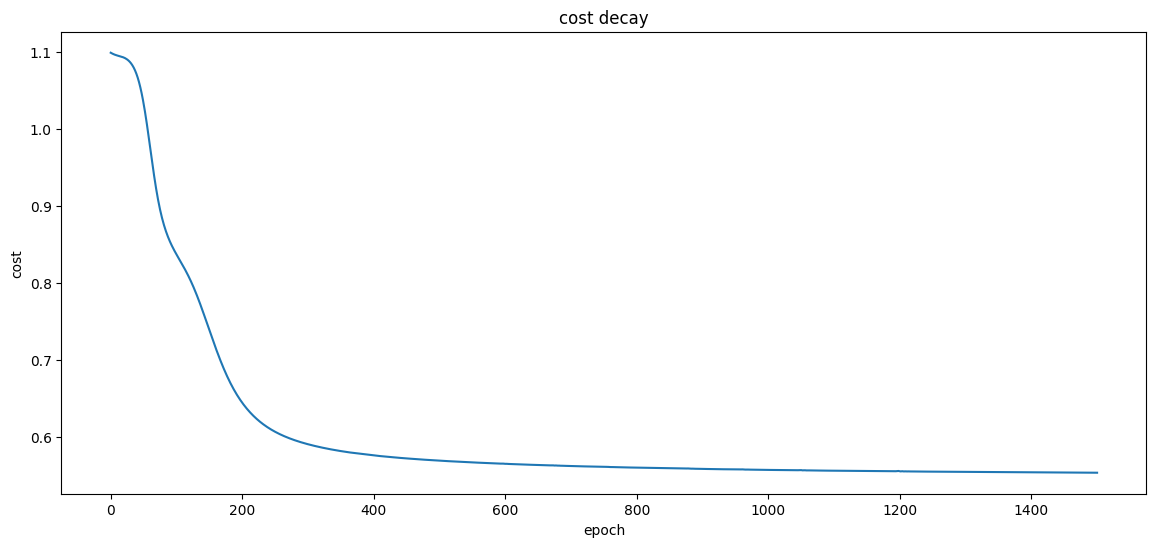

In [127]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

training(  epochs, model , loss_fn, opt  )


# Avaliação do Modelo

In [128]:
with torch.no_grad():
    model.eval()
    
    for xb, yb in test_dl:
        
        
        y_pred = model(xb.float())



    
    yf = torch.argmax(y_pred, dim=1)
    
    print(classification_report(yb, yf))        
        
            
            
    
# Dropoup --> apagar saida de um neuronio
# argmax --> pega o ag

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Fazendo Histograma dos valores de cada layer

In [129]:
MLP_Model().L1.weight

Parameter containing:
tensor([[-0.3719, -0.1442, -0.2666, -0.0608],
        [-0.2237, -0.2654, -0.4161, -0.1629],
        [ 0.4217,  0.4347, -0.0323,  0.1790],
        [ 0.4091, -0.2257, -0.0411,  0.4798],
        [ 0.1403,  0.0751,  0.2712, -0.2253],
        [-0.0017, -0.4612,  0.2705, -0.1598],
        [ 0.2195, -0.2819,  0.3762, -0.0141],
        [ 0.0811, -0.3665,  0.4739, -0.1426],
        [-0.1621,  0.2658,  0.4854, -0.4035],
        [-0.0745,  0.0492,  0.4135, -0.0542],
        [-0.2837,  0.2219,  0.4524, -0.2942],
        [ 0.0433, -0.0162, -0.3174,  0.0944],
        [-0.0961,  0.0682, -0.2440, -0.1781],
        [ 0.2540, -0.2174,  0.3671, -0.1935],
        [ 0.0017, -0.1764, -0.3818, -0.0236],
        [-0.1797, -0.2618, -0.3941, -0.4800],
        [-0.4155,  0.0306,  0.4422,  0.3251],
        [-0.3949,  0.4200,  0.0323,  0.3622],
        [ 0.0498,  0.2716,  0.0692,  0.2331],
        [-0.2476, -0.4727, -0.1946, -0.3236],
        [-0.1446, -0.0246,  0.3298, -0.3167],
        [-0.

In [130]:
MLP_Model().L1.weight.shape

torch.Size([32, 4])

In [131]:
MLP_Model().L1.weight[0][0]

tensor(0.4482, grad_fn=<SelectBackward0>)

In [132]:

# Vou ver somente de um neuronio, o 1o da layer 1

def training_alt( N_Epochs, model, loss_fn, opt  ):
    
    output_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            output = MLP_Model().L1.weight[0][0]
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            output_list.append(output.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("Value")
    plt.plot(output_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            



In [133]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

#training_alt(  epochs, model , loss_fn, opt  )

In [134]:
value_after_train = torch.histogram(MLP_Model().L1.weight.detach())

X_after = value_after_train[1][0:100]
y_after = value_after_train[0]


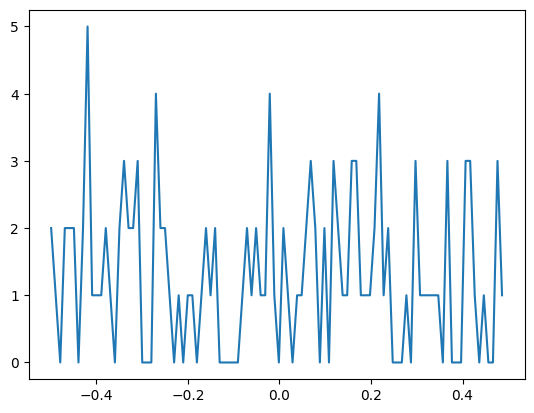

In [137]:
hist_before_train = plt.plot(X_before,y_before)

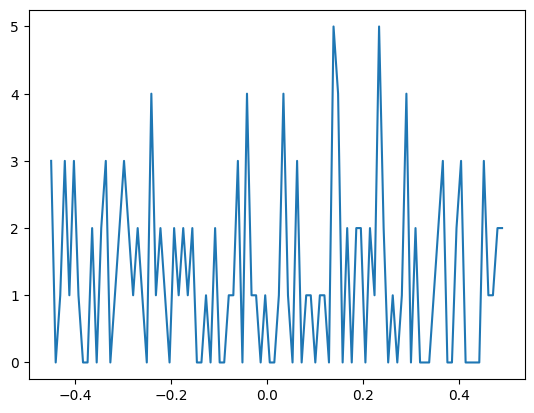

In [136]:
hist_after_train = plt.plot(X_after,y_after)